In [2]:
# %load model_evaluation_3.py
"""
如何确定更合适的k值
k：1-25
遍历所有可能的参数组合
建立相应的model
model训练
model预测
给予测试数据的准确率计算
查看最高准确率对应的k值
"""
#数据加载
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
print(x.shape,y.shape)

(150, 4) (150,)


In [3]:
#数据分离
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
#加上random_state=0可确保每次分离数据是一样的，不然分离数据不一致后续结果会受影响。
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.4)
#分离后数据维度确认
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(90, 4) (60, 4) (90,) (60,)


In [4]:
#确定k值的范围
k_range = list(range(1,26))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [5]:
#遍历参数建模、训练和预测
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
score_train = []
score_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    score_train.append(accuracy_score(y_train,y_train_pred))
    score_test.append(accuracy_score(y_test,y_test_pred))
for k in k_range:
    print(k,score_train[k-1],score_test[k-1])

1 1.0 0.9166666666666666
2 0.9888888888888889 0.8833333333333333
3 0.9888888888888889 0.9333333333333333
4 0.9888888888888889 0.9
5 1.0 0.95
6 1.0 0.9166666666666666
7 0.9777777777777777 0.9666666666666667
8 0.9888888888888889 0.9333333333333333
9 0.9888888888888889 0.9666666666666667
10 0.9888888888888889 0.9666666666666667
11 0.9888888888888889 0.9666666666666667
12 1.0 0.95
13 0.9777777777777777 0.95
14 0.9777777777777777 0.9166666666666666
15 0.9666666666666667 0.9333333333333333
16 0.9666666666666667 0.9166666666666666
17 0.9666666666666667 0.9333333333333333
18 0.9777777777777777 0.9333333333333333
19 0.9777777777777777 0.9333333333333333
20 0.9777777777777777 0.9166666666666666
21 0.9666666666666667 0.9333333333333333
22 0.9666666666666667 0.9
23 0.9666666666666667 0.9
24 0.9555555555555556 0.8833333333333333
25 0.9555555555555556 0.8666666666666667


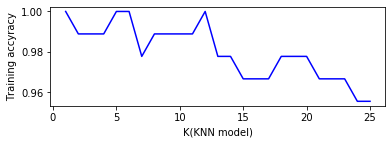

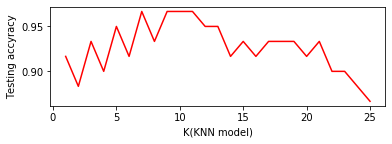

In [7]:
#可视化展示
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(k_range,score_train,'b')
plt.xlabel('K(KNN model)')
plt.ylabel('Training accyracy')
plt.show()

plt.subplot(212)
plt.plot(k_range,score_test,'r')
plt.xlabel('K(KNN model)')
plt.ylabel('Testing accyracy')

plt.show()